In [1]:
import numpy as np

# Step 1

1. The put-call parity apply for the european options
2. $$K = (S_{0}+P_{0}-C_{0})/e^{-rt}$$ 
3. $$ P_{0} = C_{0} + Ke^{-rt} - S_{0}$$
4. The put call parity does apply to the american options
5. Initial condition:
  $S_{0} = 100 = K, r = 0.05,  σ = 0.2, T = 3 = N $




In [2]:
def european_option_pricing(S_ini, K, T, r, sigma, N, optype):
  dt = T/N
  u = np.exp(sigma * np.sqrt(dt))
  d = np.exp(-sigma * np.sqrt(dt))
  p = (np.exp( r * dt) - d) /(u - d)
  C = np.zeros([N+1, N+1])
  S = np.zeros([N+1, N+1])
  delta = np.zeros([N, N])
  for i in range(0, N + 1):
        if optype == True:
          C[N, i] = max(S_ini * (u ** (i)) * (d ** (N - i)) - K, 0)
        else:
          C[N, i] = max(K - S_ini * (u ** (i)) * (d ** (N - i)), 0)
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
  for j in range(N - 1, -1, -1):
    for i in range(0, j + 1):
      C[j, i] = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])
      S[j, i] = S_ini * (u ** (i)) * (d ** (j - i))
      delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (S[j + 1, i + 1] - S[j + 1, i])
  return C[0, 0], C, S, delta


In [3]:
k = 100
r = 0.05
T = 3
call_price, C, S, delta = european_option_pricing(100, 100, 3/12, 0.05, 0.2, 3, True)
put_price, C_put, S_put, delta_put = european_option_pricing(100, 100, 3/12, 0.05, 0.2, 3, False)

In [4]:
round(call_price, 2)

4.94

In [5]:
# put-call parity vrification

print(round(call_price + k * np.exp(-r*T/12), 2) == round(put_price + k, 2))

True


In [6]:
#6. the greek at time t=0 for the call and the put option
print(delta[0, 0])
print(delta_put[0, 0])

0.5575605827113151
-0.44243941728868447


##6.B


In [7]:
for sigma in [0.2, 0.25]:
  call_price, C, S, delta = european_option_pricing(100, 100, 3/12, 0.05, sigma, 3, True)
  put_price, C_put, S_put, delta_put = european_option_pricing(100, 100, 3/12, 0.05, sigma, 3, False)
  print('for {sigma} the price of the call option : {call_price}'.format(sigma=sigma, call_price=round(call_price, 2)))
  print('for {sigma} the price of the put option : {put_price}'.format(sigma=sigma, put_price=round(put_price, 2)))
  print(round(call_price + k * np.exp(-r*T/12), 2) == round(put_price + k, 2))

for 0.2 the price of the call option : 4.94
for 0.2 the price of the put option : 3.7
True
for 0.25 the price of the call option : 6.01
for 0.25 the price of the put option : 4.77
True


As we cann see in the example above with the increase in volatility the price of the call and put option are correlated to the volatility index sigma 

In [8]:
def american_option_pricing(S_ini, K, T, r, sigma, N, optype):
    dt = T / N  
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    p = (np.exp(r * dt) - d) / (u - d)  
    C = np.zeros([N + 1, N + 1])  
    S = np.zeros([N + 1, N + 1])  
    Delta = np.zeros([N, N])  

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if optype == True:
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])
            S[j, i] = (S_ini * (u ** (i)) * (d ** (j - i)))
            if optype == True:
                C[j, i] = max(C[j, i], S[j, i] - K)  
            else:
                C[j, i] = max(C[j, i], K - S[j, i])

            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (S[j + 1, i + 1] - S[j + 1, i]) 
    return C[0, 0], C, S, Delta

In [9]:
k = 100
r = 0.05
T = 3
call_price, C, S, delta = american_option_pricing(100, 100, 3/12, 0.05, 0.2, 3, True)
put_price, C_put, S_put, delta_put = american_option_pricing(100, 100, 3/12, 0.05, 0.2, 3, False)

In [10]:
# put-call parity vrification

print(round(call_price + k * np.exp(-r*T), 2) == round(put_price + k, 2))

False


In [11]:
#6. the greek at time t=0 for the call and the put option
print(delta[0, 0])
print(delta_put[0, 0])

0.5575605827113151
-0.4595811831771715


In [12]:
for sigma in [0.2, 0.25]:
  call_price, C, S, delta = american_option_pricing(100, 100, 3/12, 0.05, sigma, 3, True)
  put_price, C_put, S_put, delta_put = american_option_pricing(100, 100, 3/12, 0.05, sigma, 3, False)
  print('for {sigma} the price of the call option : {call_price}'.format(sigma=sigma, call_price=round(call_price, 2)))
  print('for {sigma} the price of the put option : {put_price}'.format(sigma=sigma, put_price=round(put_price, 2)))
  print(round(call_price + k * np.exp(-r*T/12), 2) == round(put_price + k, 2))

for 0.2 the price of the call option : 4.94
for 0.2 the price of the put option : 3.8
False
for 0.25 the price of the call option : 6.01
for 0.25 the price of the put option : 4.87
False


In [13]:
def stock_vec(S_ini, u, d , N):
  vec_u = u * np.ones(N)
  np.cumprod(vec_u, out=vec_u)
  vec_d = d * np.ones(N)
  np.cumprod(vec_d, out=vec_d)
  res = np.concatenate((vec_d[::-1], [1.0], vec_u))
  res *= S_ini
  return res

def trinomial_tree_europe(S_ini, K, r, T, sigma, N, optype_call):
  dt = T/N #time step
  u = np.exp(sigma*np.sqrt(2*dt))
  d = 1/u
  h =dt
  pu = ((np.exp(r * h / 2) - np.exp(-sigma * np.sqrt(h / 2)))
        / (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))) ** 2
  pd = ((-np.exp(r * h / 2) + np.exp(sigma * np.sqrt(h / 2)))
        / (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))) **2
  pm = 1-pu-pd # risk netral probability
  S = stock_vec(S_ini, u, d, N)
  if optype_call:
    final_payoff = np.maximum(S-K, 0)
  else:
    final_payoff = np.maximum(K-S, 0)
  nxt_vec_prices = final_payoff
  # Proceed with iterations for the calculation of payoffs
  for i in range(1, N +1):
    vec_stock = stock_vec(S_ini, u, d,N- i)
    expectation = np.zeros(vec_stock.size)
    for j in range(expectation.size):
      tmp = nxt_vec_prices[j]*pd
      tmp += nxt_vec_prices[j + 1]*pm
      tmp += nxt_vec_prices[j + 2]*pu

      expectation[j] = tmp
      # Discount option payoff!
    nxt_vec_prices = np.exp(-r * dt) * expectation

  return nxt_vec_prices[0]



In [14]:
def trinomial_tree_american(S_ini, K, r, T, sigma, N, optype_call=True):
  dt = T/N #time step
  u = np.exp(sigma*np.sqrt(2*dt))
  d = 1/u
  h =dt
  pu = ((np.exp(r * h / 2) - np.exp(-sigma * np.sqrt(h / 2)))
        / (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))) ** 2
  pd = ((-np.exp(r * h / 2) + np.exp(sigma * np.sqrt(h / 2)))
        / (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))) **2
  pm = 1-pu-pd # risk netral probability
  S = stock_vec(S_ini, u, d, N)
  if optype_call:
    final_payoff = np.maximum(S-K, 0)
  else:
    final_payoff = np.maximum(K-S, 0)
  nxt_vec_prices = final_payoff
  # Proceed with iterations for the calculation of payoffs
  for i in range(1, N + 1):
    vec_stock = stock_vec(S_ini, u, d,N- i)
    if optype_call:
      vec_stock = np.maximum(vec_stock-K, 0)
    else:
      vec_stock = np.maximum(K-vec_stock, 0)
    expectation = np.zeros(vec_stock.size)
    for j in range(expectation.size):
      tmp = nxt_vec_prices[j]*pd
      tmp += nxt_vec_prices[j + 1]*pm
      tmp += nxt_vec_prices[j + 2]*pu

      expectation[j] = tmp
      # Discount option payoff!
    nxt_vec_prices = np.exp(-r * dt) * expectation

  return nxt_vec_prices[0]


In [15]:
call_option_call=[]
call_option_put=[]
k = [90, 95, 100, 105, 110]
for l in k:
  call_option_call.append(round(trinomial_tree_europe(100, l, 0.05, 3/12, 0.2, 1000, True),2))
  call_option_put.append(round(trinomial_tree_europe(100, l, 0.05, 3/12, 0.2, 1000, False),2))
  

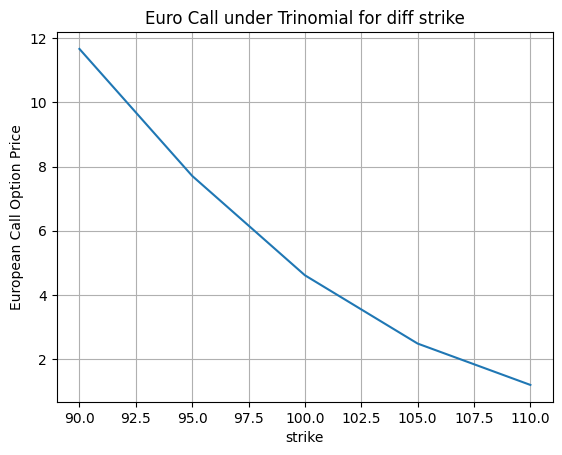

In [16]:
import matplotlib.pyplot as plt

plt.plot(k, call_option_call)
plt.title("Euro Call under Trinomial for diff strike")
plt.xlabel("strike")
plt.ylabel("European Call Option Price")
plt.grid(True)
plt.show()

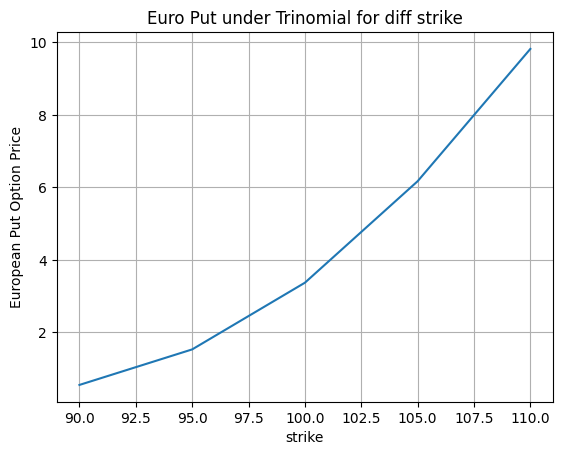

In [17]:
plt.plot(k, call_option_put)
plt.title("Euro Put under Trinomial for diff strike")
plt.xlabel("strike")
plt.ylabel("European Put Option Price")
plt.grid(True)
plt.show()

In [18]:
call_option_american_call=[]
call_option_american_put=[]
k = [90, 95, 100, 105, 110]
for l in k:
  call_option_american_call.append(round(trinomial_tree_american(100, l, 0.05, 3/12, 0.2, 1000, True),2))
  call_option_american_put.append(round(trinomial_tree_american(100, l, 0.05, 3/12, 0.2, 1000, False),2))

In [19]:
for i in range(len(k)):
  print(round(call_option_call[i] + k[i]* np.exp(-0.05*3/12),2) == round(call_option_put[i]+100, 2))

True
True
True
False
True


In [20]:
for i in range(len(k)):
  print(round(call_option_american_call[i] + k[i]* np.exp(-0.05*3/12),2) == round(call_option_american_put[i]+100, 2))

True
True
True
False
True


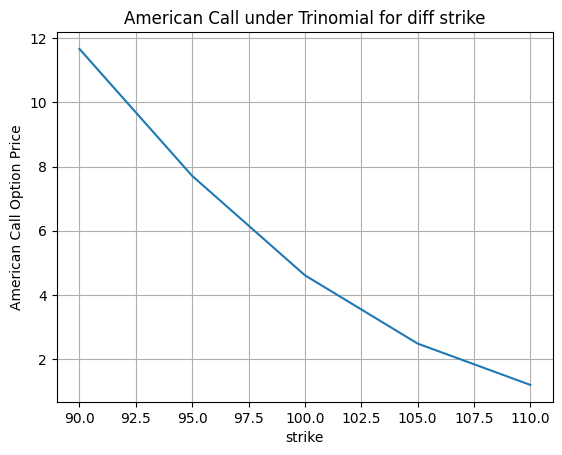

In [21]:
plt.plot(k, call_option_american_call)
plt.title("American Call under Trinomial for diff strike")
plt.xlabel("strike")
plt.ylabel("American Call Option Price")
plt.grid(True)
plt.show()

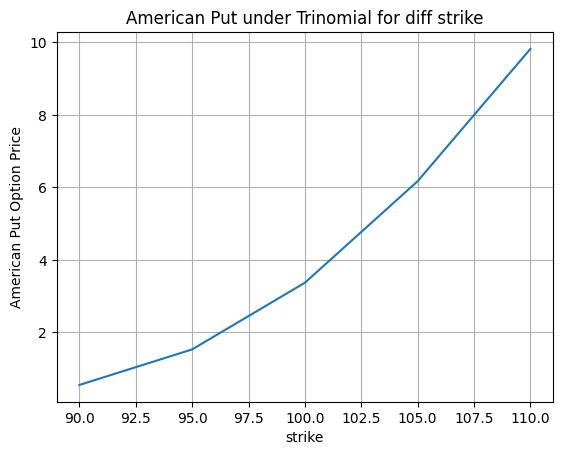

In [22]:
plt.plot(k, call_option_american_put)
plt.title("American Put under Trinomial for diff strike")
plt.xlabel("strike")
plt.ylabel("American Put Option Price")
plt.grid(True)
plt.show()

In [23]:
for N in [3, 5, 10, 100, 1000]:
  print('For the following N = {N} we have the following prices : '.format(N=N)) 
  for k in [90, 95, 100, 105, 110]:
    price = trinomial_tree_europe(100 , k, 0.05, 3/12, 0.2, N, True)
    print('   The price of the call option with the sprike {k} = {price}'.format(k=k, price=price))

For the following N = 3 we have the following prices : 
   The price of the call option with the sprike 90 = 11.681839540754604
   The price of the call option with the sprike 95 = 7.832900142910283
   The price of the call option with the sprike 100 = 4.452737681084106
   The price of the call option with the sprike 105 = 2.6113178112186297
   The price of the call option with the sprike 110 = 1.1361616826005152
For the following N = 5 we have the following prices : 
   The price of the call option with the sprike 90 = 11.700030529528874
   The price of the call option with the sprike 95 = 7.73549797418681
   The price of the call option with the sprike 100 = 4.516558500901135
   The price of the call option with the sprike 105 = 2.5093831952499874
   The price of the call option with the sprike 110 = 1.2373355149721068
For the following N = 10 we have the following prices : 
   The price of the call option with the sprike 90 = 11.68058694722701
   The price of the call option with th

In [24]:
for N in [3, 5, 10, 100, 1000]:
  print('For the following N = {N} we have the following prices : '.format(N=N)) 
  for k in [90, 95, 100, 105, 110]:
    price = trinomial_tree_american(100 , k, 0.05, 3/12, 0.2, N, False)
    print('   The price of the call option with the sprike {k} = {price}'.format(k=k, price=price))

For the following N = 3 we have the following prices : 
   The price of the call option with the sprike 90 = 0.5638415852039101
   The price of the call option with the sprike 95 = 1.6527911898289978
   The price of the call option with the sprike 100 = 3.2105177304722297
   The price of the call option with the sprike 105 = 6.306986863076163
   The price of the call option with the sprike 110 = 9.769719736927453
For the following N = 5 we have the following prices : 
   The price of the call option with the sprike 90 = 0.5820325739781911
   The price of the call option with the sprike 95 = 1.5553890211055352
   The price of the call option with the sprike 100 = 3.274338550289266
   The price of the call option with the sprike 105 = 6.205052247107527
   The price of the call option with the sprike 110 = 9.870893569299051
For the following N = 10 we have the following prices : 
   The price of the call option with the sprike 90 = 0.5625889916765405
   The price of the call option with t